In [1]:
%run config.ipynb

In [2]:
# Connect to Cortex
cortex = Cortex.client()

In [3]:
# Our stock symbols
symbols = ['fb', 'xlf', 'aapl']
s = symbols[0]

In [4]:
print('Loading stock prices for %s' % s)
ds = cortex.dataset('demo/stock-prices-%s' % s)
c = ds.contract('stock-prices')

Loading stock prices for fb


In [5]:
from keras.models import load_model
model = load_model('model_stock_prices_%s.h5' % s)

Using TensorFlow backend.


In [6]:
# Load our scaler model so we can inverse the transform for visualization/validation
price_scaler = c.load_model_file(tag='prices_scaler_%s' % s)

In [29]:
df = c.load_feature_file(tag='prices_%s' % s)

In [40]:
from datetime import timedelta

look_back = 30
future_df = df.copy(deep=True)

start_d = future_df.index.date[-1]
start_idx = len(future_df) - 1
results = {}

for i in range(look_back):
    ix = start_idx + i + 1
    pred_d = start_d + timedelta(days=i+1)
    X = future_df.loc[future_df.index[ix-look_back:ix], 'close'].as_matrix()
    X = X.reshape(1,look_back,1)
    y = model.predict(X)
    pred_price = y[0][0]
    future_df.loc[pd.to_datetime(pred_d), 'close'] = pred_price
    future_df.loc[pd.to_datetime(pred_d), 'Pred'] = pred_price
    print('Predicted price for %s is $%.2f' % (pred_d, price_scaler.inverse_transform(y)))

Predicted price for 2018-07-31 is $178.02
Predicted price for 2018-08-01 is $180.55
Predicted price for 2018-08-02 is $182.17
Predicted price for 2018-08-03 is $183.57
Predicted price for 2018-08-04 is $184.64
Predicted price for 2018-08-05 is $185.45
Predicted price for 2018-08-06 is $186.03
Predicted price for 2018-08-07 is $186.45
Predicted price for 2018-08-08 is $186.76
Predicted price for 2018-08-09 is $186.99
Predicted price for 2018-08-10 is $187.16
Predicted price for 2018-08-11 is $187.30
Predicted price for 2018-08-12 is $187.41
Predicted price for 2018-08-13 is $187.50
Predicted price for 2018-08-14 is $187.58
Predicted price for 2018-08-15 is $187.65
Predicted price for 2018-08-16 is $187.70
Predicted price for 2018-08-17 is $187.75
Predicted price for 2018-08-18 is $187.80
Predicted price for 2018-08-19 is $187.83
Predicted price for 2018-08-20 is $187.86
Predicted price for 2018-08-21 is $187.89
Predicted price for 2018-08-22 is $187.91
Predicted price for 2018-08-23 is 

In [41]:
future_df.loc[:, 'close'] = price_scaler.inverse_transform(future_df.loc[:, 'close'])
future_df.loc[:, 'Pred'] = price_scaler.inverse_transform(future_df.loc[:, 'Pred'])

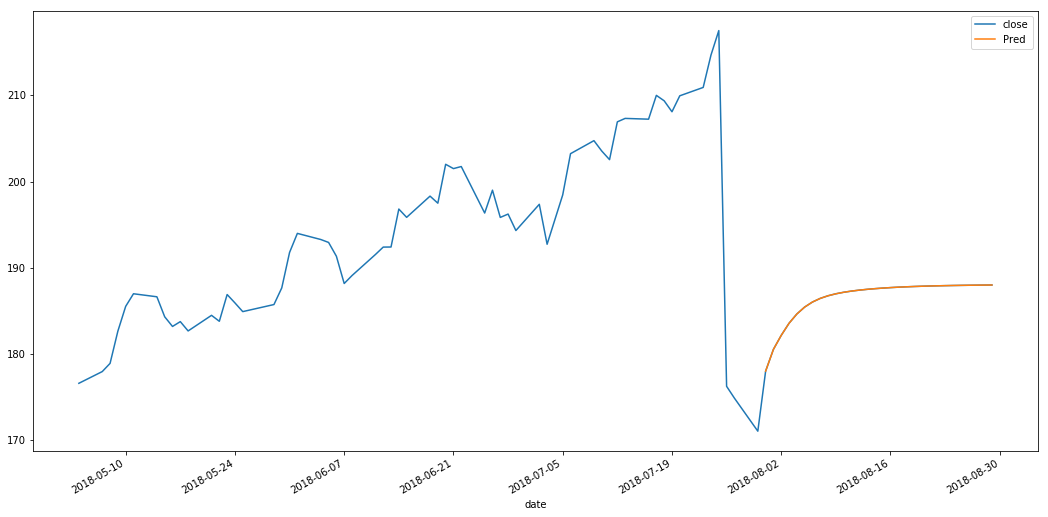

In [48]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [18,9]
future_df.tail(look_back*3).plot()

In [49]:
future_df.tail(look_back)

,close,Pred
date,,
2018-07-31,178.016207,178.016207
2018-08-01,180.545814,180.545814
2018-08-02,182.168863,182.168863
2018-08-03,183.568330,183.568330
2018-08-04,184.643049,184.643049
2018-08-05,185.446600,185.446600
2018-08-06,186.032069,186.032069
2018-08-07,186.453214,186.453214
2018-08-08,186.759536,186.759536
